<a href="https://colab.research.google.com/github/shreyakarki71/nypd-crime-dataset-analysis-/blob/main/Final_Python_Group_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installed kaggle
!pip install kaggle -q

In [2]:
# import file with kaggle api code
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyakarki79","key":"cea9a576b55b9154def85e653ea43dbf"}'}

In [3]:
# create kaggle folder

! mkdir ~/.kaggle


In [4]:
# copying kaggle.json to kaggle folder
! cp kaggle.json ~/.kaggle/

In [5]:
# permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# list all kaggle dataset
! kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
rohitgrewal/airlines-flights-data                               Airlines Flights Data                                  2440299  2025-07-29 09:16:00.463000          13623        271  1.0              
wasiqaliyasir/breast-cancer-dataset                             Breast cancer dataset                                    49830  2025-07-30 12:52:44.057000           8104        279  1.0              
kunshbhatia/delhi-air-quality-dataset                           Delhi Air Quality Dataset                                30430  2025-07-28 14:00:14.247000           5578        112  1.0              


In [7]:
#dataset downloaded

! kaggle datasets download -d aniket0712/nypd-complaint-data-historic

Dataset URL: https://www.kaggle.com/datasets/aniket0712/nypd-complaint-data-historic
License(s): CC0-1.0
 97% 465M/481M [00:00<00:00, 1.22GB/s]
100% 481M/481M [00:00<00:00, 1.21GB/s]


In [10]:
! unzip nypd-complaint-data-historic

Archive:  nypd-complaint-data-historic.zip
replace NYPD_Complaint_Data_Historic.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [11]:
# check which files were extracted

!ls

kaggle.json			  nypd-complaint-data-historic.zip
NYPD_Complaint_Data_Historic.csv  sample_data


In [12]:
!pip install pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.5 MB/s eta 0:00:00


In [13]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as pdr

In [14]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv', on_bad_lines='skip', skiprows=[7987350], low_memory = False)

# skipping row 7987350 as it has parserror

In [15]:
# identify what are the column

df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [16]:
len(df)

1724765

In [17]:
# cleaning data. removing unwanted columns

col_del = ['ADDR_PCT_CD','KY_CD', 'PD_CD','JURIS_DESC', 'JURISDICTION_CODE', 'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD', 'TRANSIT_DISTRICT', 'Lat_Lon', 'STATION_NAME', 'LOC_OF_OCCUR_DESC', 'CMPLNT_TO_DT','CMPLNT_TO_TM', 'PD_DESC' ]
df1 = df.drop(columns = col_del)

# rename columns

df1 = df1.rename(columns={'CRM_ATPT_CPTD_CD': 'CRIME_STATUS', 'LAW_CAT_CD': 'CRIME_CTGORY', 'Latitude' : 'LAT', 'Longitude': 'LONG'})
df1.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'RPT_DT', 'OFNS_DESC',
       'CRIME_STATUS', 'CRIME_CTGORY', 'BORO_NM', 'PREM_TYP_DESC',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'LAT', 'LONG', 'PATROL_BORO',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [18]:
# Convert the 'CMPLNT_FR_DT' string to datetime format # need to check NaT values

df1['CMPLNT_FR_DT'] = pd.to_datetime(df1['CMPLNT_FR_DT'], errors='coerce')

In [19]:
# filtering data from 2013 to 2023
def filter_by_year(row):
  start_year = 2013
  end_year = 2023

  if start_year<= row['CMPLNT_FR_DT'].year <= end_year:
      return True
  else:
    return False

filtered_df = df1[df1.apply(filter_by_year, axis=1)]
len(filtered_df)

1072

In [20]:
# count NaN values

filtered_df.isna().sum()

,0
CMPLNT_NUM,0
CMPLNT_FR_DT,0
CMPLNT_FR_TM,0
RPT_DT,0
OFNS_DESC,0
CRIME_STATUS,0
CRIME_CTGORY,0
BORO_NM,0
PREM_TYP_DESC,0
SUSP_AGE_GROUP,0


In [21]:
filtered_df.head(10)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,OFNS_DESC,CRIME_STATUS,CRIME_CTGORY,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,LAT,LONG,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
53,233475359,2021-09-08,21:00:00,09/08/2021,PETIT LARCENY,COMPLETED,MISDEMEANOR,BRONX,GROCERY/BODEGA,UNKNOWN,BLACK,F,40.820743,-73.848431,PATROL BORO BRONX,UNKNOWN,UNKNOWN,D
5236,225019247,2016-05-16,10:00:00,03/01/2021,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,RESIDENCE - PUBLIC HOUSING,UNKNOWN,UNKNOWN,F,40.773748,-73.932080,PATROL BORO QUEENS NORTH,18-24,BLACK HISPANIC,F
6494,226363302,2021-04-01,00:10:00,04/01/2021,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,FELONY,QUEENS,RESIDENCE - APT. HOUSE,UNKNOWN,UNKNOWN,U,40.757117,-73.860091,PATROL BORO QUEENS NORTH,45-64,ASIAN / PACIFIC ISLANDER,M
6710,222531095,2021-01-02,14:22:00,01/02/2021,PETIT LARCENY,COMPLETED,MISDEMEANOR,BRONX,DEPARTMENT STORE,25-44,UNKNOWN,M,40.851284,-73.852132,PATROL BORO BRONX,UNKNOWN,UNKNOWN,D
7951,224005221,2021-02-03,22:00:00,02/03/2021,FELONY ASSAULT,COMPLETED,FELONY,BRONX,STREET,25-44,BLACK,F,40.877393,-73.866491,PATROL BORO BRONX,45-64,BLACK,M
9103,223417962,2021-01-22,10:00:00,01/22/2021,FORGERY,COMPLETED,FELONY,BRONX,STREET,45-64,BLACK,M,40.873066,-73.858433,PATROL BORO BRONX,UNKNOWN,UNKNOWN,E
13656,223466115,2021-01-23,16:30:00,01/23/2021,HARRASSMENT 2,COMPLETED,VIOLATION,BROOKLYN,RESIDENCE - APT. HOUSE,45-64,BLACK,F,40.673181,-73.929313,PATROL BORO BKLYN NORTH,45-64,BLACK,F
20614,230951424,2021-07-16,21:00:00,07/16/2021,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,STREET,45-64,BLACK,M,40.847846,-73.934808,PATROL BORO MAN NORTH,45-64,BLACK,F
20632,235892929,2021-11-03,23:20:00,11/04/2021,PETIT LARCENY,COMPLETED,MISDEMEANOR,QUEENS,CHAIN STORE,UNKNOWN,BLACK,M,40.726770,-73.853194,PATROL BORO QUEENS NORTH,UNKNOWN,UNKNOWN,D
26445,235473363,2021-10-24,17:00:00,10/25/2021,BURGLARY,COMPLETED,FELONY,MANHATTAN,RESIDENCE - PUBLIC HOUSING,(null),(null),(null),40.845215,-73.933959,PATROL BORO MAN NORTH,25-44,BLACK,M


In [22]:
filtered_df.isin(['(null)']).sum() # count the number of 'null' values

,0
CMPLNT_NUM,0
CMPLNT_FR_DT,0
CMPLNT_FR_TM,0
RPT_DT,0
OFNS_DESC,0
CRIME_STATUS,0
CRIME_CTGORY,0
BORO_NM,0
PREM_TYP_DESC,0
SUSP_AGE_GROUP,170


In [23]:
# drop the rows with more than 3 null values
drop_row = filtered_df[filtered_df.isin(['(null)']).sum(axis=1) > 3].index
filtered_df = filtered_df.drop(drop_row)
len(drop_row)

2

In [24]:
#Replace '(null)' with NaN
filtered_df.replace('(null)', np.nan, inplace=True)

In [25]:
filtered_df.isna().sum()

,0
CMPLNT_NUM,0
CMPLNT_FR_DT,0
CMPLNT_FR_TM,0
RPT_DT,0
OFNS_DESC,0
CRIME_STATUS,0
CRIME_CTGORY,0
BORO_NM,0
PREM_TYP_DESC,0
SUSP_AGE_GROUP,168


In [26]:
filtered_df['VIC_AGE_GROUP'].value_counts()

,count
VIC_AGE_GROUP,
25-44,378
UNKNOWN,319
45-64,207
18-24,82
<18,43
65+,41


In [27]:
filtered_df['SUSP_AGE_GROUP'].value_counts()

,count
SUSP_AGE_GROUP,
UNKNOWN,392
25-44,305
45-64,103
18-24,73
<18,17
65+,12


In [28]:
filtered_df['VIC_AGE_GROUP'].unique()

array(['UNKNOWN', '18-24', '45-64', '25-44', '65+', '<18'], dtype=object)

In [29]:
filtered_df['SUSP_AGE_GROUP'].unique()

array(['UNKNOWN', '25-44', '45-64', nan, '18-24', '65+', '<18'],
      dtype=object)

In [30]:
valid_ages = ['18-24', '25-44', '45-64', '65+', '<18', 'UNKNOWN']

#Keep only rows with valid ages
filtered_df = filtered_df[filtered_df['VIC_AGE_GROUP'].isin(valid_ages)]
filtered_df = filtered_df[filtered_df['SUSP_AGE_GROUP'].isin(valid_ages)]

In [31]:
len(filtered_df)

902

In [32]:
filtered_df.isna().sum()

,0
CMPLNT_NUM,0
CMPLNT_FR_DT,0
CMPLNT_FR_TM,0
RPT_DT,0
OFNS_DESC,0
CRIME_STATUS,0
CRIME_CTGORY,0
BORO_NM,0
PREM_TYP_DESC,0
SUSP_AGE_GROUP,0


In [33]:
filtered_df['VIC_AGE_GROUP'].unique()

array(['UNKNOWN', '18-24', '45-64', '25-44', '65+', '<18'], dtype=object)

In [34]:
# drop NaN from the rows.

nan_to_drop = ['LAT', 'LONG', 'CRIME_STATUS', 'PATROL_BORO', 'OFNS_DESC']
filtered_df = filtered_df.dropna(subset=nan_to_drop)

In [35]:
filtered_df.isna().sum()

,0
CMPLNT_NUM,0
CMPLNT_FR_DT,0
CMPLNT_FR_TM,0
RPT_DT,0
OFNS_DESC,0
CRIME_STATUS,0
CRIME_CTGORY,0
BORO_NM,0
PREM_TYP_DESC,0
SUSP_AGE_GROUP,0


In [36]:
# Fill missing BORO_NM values with the most frequent value

most_frequent_boro = filtered_df['BORO_NM'].mode()[0]
filtered_df['BORO_NM'] = filtered_df['BORO_NM'].fillna(most_frequent_boro)


In [37]:
mode_value = filtered_df['PREM_TYP_DESC'].mode()[0]
filtered_df['PREM_TYP_DESC'] = filtered_df['PREM_TYP_DESC'].fillna(mode_value)

In [38]:
filtered_df.isna().sum()

,0
CMPLNT_NUM,0
CMPLNT_FR_DT,0
CMPLNT_FR_TM,0
RPT_DT,0
OFNS_DESC,0
CRIME_STATUS,0
CRIME_CTGORY,0
BORO_NM,0
PREM_TYP_DESC,0
SUSP_AGE_GROUP,0


In [39]:
print(filtered_df['VIC_AGE_GROUP'].isin(['UNKNOWN']).sum())
print(filtered_df['SUSP_AGE_GROUP'].isin(['UNKNOWN']).sum())

261
392


In [40]:
#find  unique combination of borough and crime category
for boro in filtered_df['BORO_NM'].dropna().unique():  # Skip missing borough names
    for crime in filtered_df['CRIME_CTGORY'].dropna().unique():  # Skip missing crime types

        # condition for current borough and crime
        condition = (filtered_df['BORO_NM'] == boro) & (filtered_df['CRIME_CTGORY'] == crime)

        # Find the most common value
        most_common_age_group = filtered_df.loc[condition, 'SUSP_AGE_GROUP'].mode()

        # If there's at least one common value, fill missing values
        if not most_common_age_group.empty:
            filtered_df.loc[condition & filtered_df['SUSP_AGE_GROUP'].isna(), 'SUSP_AGE_GROUP'] = most_common_age_group.iloc[0]
        else:
            # fill with Unknown if no mode is found
            filtered_df.loc[condition & df_copy['SUSP_AGE_GROUP'].isna(), 'SUSP_AGE_GROUP'] = 'UNKNOWN'



In [41]:
filtered_df['SUSP_AGE_GROUP'].isna().sum()

np.int64(0)

In [42]:
# do the same for victim age group

for boro in filtered_df['BORO_NM'].dropna().unique():  # Skip missing borough names
    for crime in filtered_df['CRIME_CTGORY'].dropna().unique():  # Skip missing crime types

        # Define the filter condition for current borough and crime
        condition = (filtered_df['BORO_NM'] == boro) & (filtered_df['CRIME_CTGORY'] == crime)

        # Find the most common value (mode) of VIC_AGE_GROUP in this group
        most_common_vic_age_group = filtered_df.loc[condition, 'VIC_AGE_GROUP'].mode()

        # If there's at least one common value, fill missing values in this group
        if not most_common_vic_age_group.empty:
            filtered_df.loc[condition & filtered_df['VIC_AGE_GROUP'].isna(), 'VIC_AGE_GROUP'] = most_common_vic_age_group.iloc[0]
        else:
            #  fill with 'Unknown' if no mode is found
            filtered_df.loc[condition & filtered_df['VIC_AGE_GROUP'].isna(), 'VIC_AGE_GROUP'] = 'UNKNOWN'


In [43]:
filtered_df['VIC_AGE_GROUP'].isna().sum()

np.int64(0)

In [44]:
filtered_df.isna().sum()

,0
CMPLNT_NUM,0
CMPLNT_FR_DT,0
CMPLNT_FR_TM,0
RPT_DT,0
OFNS_DESC,0
CRIME_STATUS,0
CRIME_CTGORY,0
BORO_NM,0
PREM_TYP_DESC,0
SUSP_AGE_GROUP,0


In [45]:
print(filtered_df['SUSP_AGE_GROUP'].value_counts().get('UNKNOWN', 0)) # missing suspect age values were filled with 'UNKNOWN'
print(filtered_df['VIC_AGE_GROUP'].value_counts().get('UNKNOWN', 0)) # missing victim age values were filled with Unknown

392
261


In [46]:
suspect_ages = filtered_df['SUSP_AGE_GROUP'].value_counts()
print(suspect_ages)
print(max(suspect_ages))

SUSP_AGE_GROUP
UNKNOWN    392
25-44      305
45-64      103
18-24       73
<18         17
65+         12
Name: count, dtype: int64
392


In [47]:
victim_ages = filtered_df['VIC_AGE_GROUP'].value_counts()
print(victim_ages)
print(max(victim_ages))

VIC_AGE_GROUP
25-44      327
UNKNOWN    261
45-64      168
18-24       73
<18         40
65+         33
Name: count, dtype: int64
327


In [48]:
filtered_df['VIC_SEX'].value_counts()

,count
VIC_SEX,
F,360
M,301
D,186
E,55


In [49]:
len(filtered_df)

902

In [50]:
# replacing D and E with unknown for vic_sex and sus_sex

filtered_df['VIC_SEX'] = filtered_df['VIC_SEX'].replace({'D': 'UNKNOWN', 'E': 'UNKNOWN'})

filtered_df['VIC_SEX'].value_counts()


,count
VIC_SEX,
F,360
M,301
UNKNOWN,241


In [51]:
filtered_df['SUSP_SEX'] = filtered_df['SUSP_SEX'].replace({'U':'UNKNOWN'}) # for consistency
filtered_df['SUSP_SEX'].value_counts()

,count
SUSP_SEX,
M,551
UNKNOWN,202
F,149


In [52]:
filtered_df['VIC_AGE_GROUP'].value_counts() # finding all ages

,count
VIC_AGE_GROUP,
25-44,327
UNKNOWN,261
45-64,168
18-24,73
<18,40
65+,33


In [53]:
# Count crime types
crime_types = filtered_df['CRIME_CTGORY'].value_counts()
crime_types

,count
CRIME_CTGORY,
MISDEMEANOR,492
FELONY,288
VIOLATION,122


In [54]:
# Count crimes by hour
filtered_df['HOUR'] = pd.to_datetime(filtered_df['CMPLNT_FR_TM']).dt.hour
crime_hours = filtered_df['HOUR'].value_counts().sort_index()
crime_hours

/tmp/ipython-input-2681911530.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['HOUR'] = pd.to_datetime(filtered_df['CMPLNT_FR_TM']).dt.hour


,count
HOUR,
0,42
1,22
2,29
3,20
4,26
5,14
6,17
7,25
8,36


In [55]:
print(max(crime_hours)) # maximum crimes happen at 17:00PM

66


In [56]:
# Extract the year from the 'CMPLNT_FR_DT' column
filtered_df['YEAR'] = pd.to_datetime(filtered_df['CMPLNT_FR_DT']).dt.year

filtered_df.groupby('YEAR').size()

,0
YEAR,
2014,1
2015,1
2016,2
2018,1
2019,1
2020,12
2021,872
2022,10
2023,2


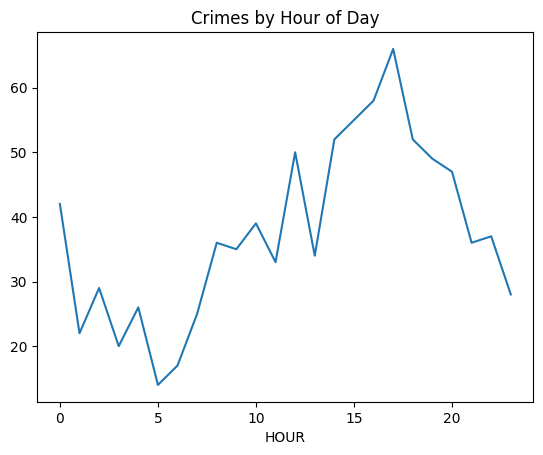

In [57]:
import matplotlib.pyplot as plt


filtered_df['HOUR'].value_counts().sort_index().plot(kind='line')
plt.title('Crimes by Hour of Day')
plt.show() # 1am to 5am crimes is down. # peaks 15:00 to 17:00

In [58]:
hourly_stats = filtered_df['HOUR'].describe(percentiles=[.25, .5, .75]).to_frame().T
hourly_stats['range'] = hourly_stats['max'] - hourly_stats['min']
hourly_stats['IQR'] = hourly_stats['75%'] - hourly_stats['25%']

print("Hourly Crime Distribution Statistics:")
display(hourly_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'IQR']])

# Most Common Hour: 2:00 PM (median/50th percentile)
#High Crime Window: 9:00 AM - 6:00 PM (middle 50% of crimes, IQR=9 hours)
#Average Crime Time: 1:15 PM (mean=13.15)
#Earliest Crimes: Midnight (min=0)
#Latest Crimes: 11:00 PM (max=23)
# Standard Deviation: ±6.55 hours - Crime times vary widely (not tightly clustered around the average)


Hourly Crime Distribution Statistics:


,count,mean,std,min,25%,50%,75%,max,range,IQR
HOUR,902.0,12.874723,6.47773,0.0,8.0,14.0,18.0,23.0,23.0,10.0


<Axes: xlabel='DAY_NAME'>

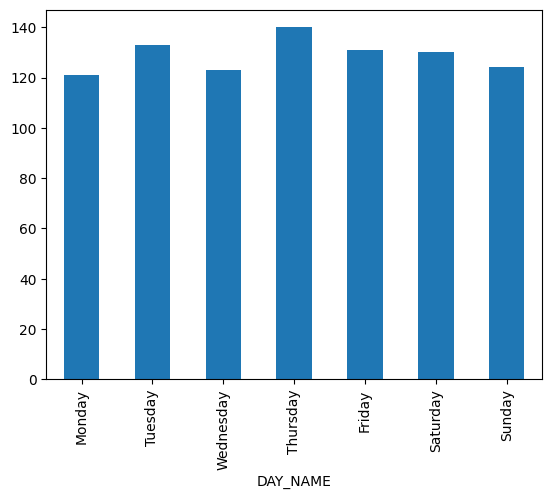

In [59]:
# Extract day names
filtered_df['DAY_NAME'] = pd.to_datetime(filtered_df['CMPLNT_FR_DT']).dt.day_name()

# Plot
filtered_df['DAY_NAME'].value_counts().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(kind='bar')

<Axes: title={'center': 'Crimes by Month'}, xlabel='MONTH'>

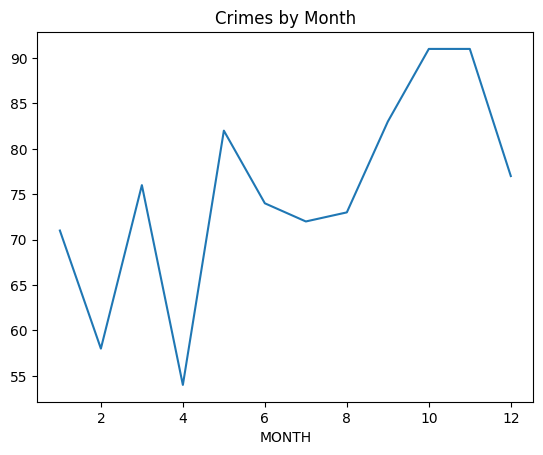

In [60]:
# extract the month
filtered_df['MONTH'] = pd.to_datetime(filtered_df['CMPLNT_FR_DT']).dt.month

filtered_df.groupby('MONTH').size().plot(title='Crimes by Month')

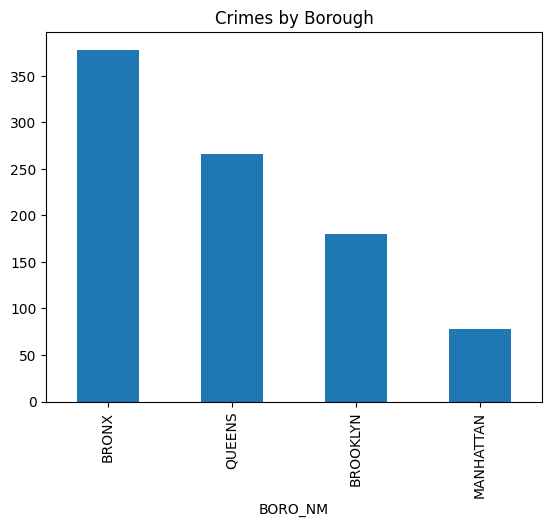

In [61]:
boro_counts = filtered_df['BORO_NM'].value_counts()
boro_counts.plot(kind='bar')
plt.title('Crimes by Borough')
plt.show() # rename the axis

In [62]:
# Cross-tabulation (victim vs suspect ages)
age_comparison = pd.crosstab(filtered_df['VIC_AGE_GROUP'],filtered_df['SUSP_AGE_GROUP'],margins=True)
age_comparison

SUSP_AGE_GROUP,18-24,25-44,45-64,65+,<18,UNKNOWN,All
VIC_AGE_GROUP,,,,,,,
18-24,17,24,5,2,0,25,73
25-44,29,124,27,1,3,143,327
45-64,7,47,32,5,3,74,168
65+,0,9,1,1,1,21,33
<18,2,13,5,0,8,12,40
UNKNOWN,18,88,33,3,2,117,261
All,73,305,103,12,17,392,902


Suspect-Victim Gender Crosstab:
VIC_SEX     F    M  UNKNOWN
SUSP_SEX                   
F          76   46       27
M         216  159      176
UNKNOWN    68   96       38


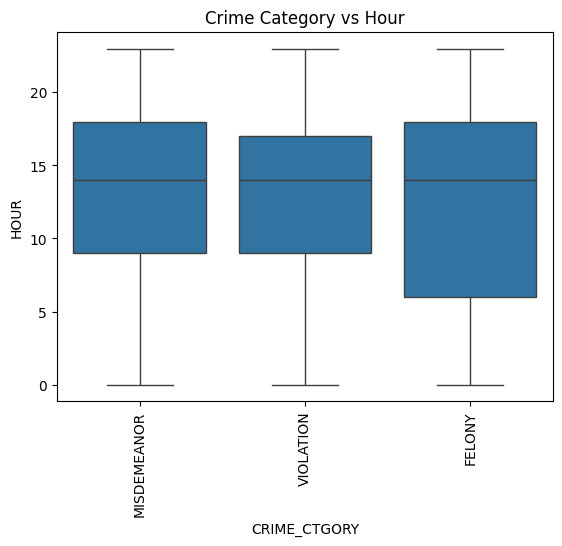

In [63]:
import seaborn as sns

# Gender pairing
gender_pair = pd.crosstab(filtered_df['SUSP_SEX'], filtered_df['VIC_SEX'])
print("Suspect-Victim Gender Crosstab:")
print(gender_pair)

# Crime category by hour
sns.boxplot(x='CRIME_CTGORY', y='HOUR', data=filtered_df)
plt.xticks(rotation=90)
plt.title('Crime Category vs Hour')
plt.show()

#Female suspects tend to have more female victims (345,581), but also a significant number of male victims (202,229).

#Male suspects have a very large number of female victims (930,812), and a large number of male victims (676,407).

#Both male and female suspects have more female victims than male victims, interesting as it suggests a higher rate of victimization for females

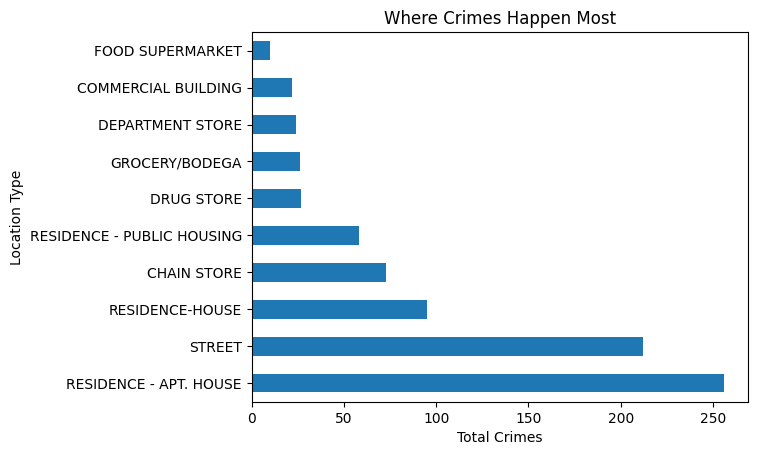

In [64]:
# Top 10 crime locations
premise_counts = filtered_df['PREM_TYP_DESC'].value_counts().head(10)

premise_counts.plot(kind='barh')

plt.title('Where Crimes Happen Most')
plt.xlabel('Total Crimes')  # x-axis label
plt.ylabel('Location Type')  #  y-axis label
plt.show()

In [65]:
# Group by Borough
borough_counts = filtered_df.dropna(subset=['BORO_NM'])['BORO_NM'].value_counts()
borough_counts


,count
BORO_NM,
BRONX,378
QUEENS,266
BROOKLYN,180
MANHATTAN,78


In [66]:
import seaborn as sns

In [67]:
filtered_df['YEAR'] = pd.to_datetime(filtered_df['CMPLNT_FR_DT']).dt.year

top_crimes_by_year = filtered_df.groupby(['YEAR', 'OFNS_DESC']).size().unstack().fillna(0)
top_crimes_by_year_summary = top_crimes_by_year
top_crimes_by_year_summary


OFNS_DESC,ALCOHOLIC BEVERAGE CONTROL LAW,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FORGERY,FRAUDS,...,OFFENSES AGAINST THE PERSON,PETIT LARCENY,POSSESSION OF STOLEN PROPERTY,RAPE,ROBBERY,SEX CRIMES,THEFT OF SERVICES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,VEHICLE AND TRAFFIC LAWS
YEAR,,,,,,,,,,,,,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2021,1.0,3.0,143.0,18.0,88.0,7.0,5.0,95.0,6.0,2.0,...,3.0,171.0,1.0,2.0,29.0,6.0,1.0,8.0,4.0,19.0
2022,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2023,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Group data by 'YEAR' and 'CRIME_STATUS'
crime_status_by_year = filtered_df.groupby(['YEAR', 'CRIME_STATUS']).size().unstack().fillna(0)

# Calculate the total number of crimes for each year
crime_status_by_year['Total'] = crime_status_by_year.sum(axis=1)

# Calculate percentages for each crime status by dividing the count by the total for each year
crime_status_by_year['Completed %'] = (crime_status_by_year['COMPLETED'] / crime_status_by_year['Total']) * 100
crime_status_by_year['Attempted %'] = (crime_status_by_year['ATTEMPTED'] / crime_status_by_year['Total']) * 100


table = crime_status_by_year[['COMPLETED', 'ATTEMPTED', 'Total', 'Completed %', 'Attempted %']]
table.round(2)  # round for neatness



#Completed crimes increased by nearly 50 from 2013 to 2023.
#Attempted crimes stayed fairly stable around 7,500 cases per year.
#Attempted crime percentage dropped from 1.95% in 2013 to 1.44% in 2023
#Most reported crimes are completed, and this trend is rising.
#2020 had noticeable drop in total crimes, likely due to COVID-19 restrictions.



CRIME_STATUS,COMPLETED,ATTEMPTED,Total,Completed %,Attempted %
YEAR,,,,,
2014,1.0,0.0,1.0,100.00,0.00
2015,1.0,0.0,1.0,100.00,0.00
2016,1.0,1.0,2.0,50.00,50.00
2018,1.0,0.0,1.0,100.00,0.00
2019,1.0,0.0,1.0,100.00,0.00
2020,11.0,1.0,12.0,91.67,8.33
2021,854.0,18.0,872.0,97.94,2.06
2022,10.0,0.0,10.0,100.00,0.00
2023,2.0,0.0,2.0,100.00,0.00


In [69]:
years = filtered_df['YEAR'].unique()

# empty DataFrame to store the comparison results
comparison_all_years = pd.DataFrame()

# Loop over each year and get the crime category counts
for year in years:
    crime_category_year = filtered_df[filtered_df['YEAR'] == year].groupby('CRIME_CTGORY').size()
    comparison_all_years[year] = crime_category_year

# Fill NaN values with 0s where there is no data for a particular year
comparison_all_years = comparison_all_years.fillna(0)

# Sort the columns by year in ascending order
comparison_all_years = comparison_all_years.sort_index(axis=1)


comparison_all_years



,2014,2015,2016,2018,2019,2020,2021,2022,2023
CRIME_CTGORY,,,,,,,,,
FELONY,1.0,1.0,0.0,1.0,1.0,4,275,5.0,0.0
MISDEMEANOR,0.0,0.0,0.0,0.0,0.0,5,486,0.0,1.0
VIOLATION,0.0,0.0,2.0,0.0,0.0,3,111,5.0,1.0


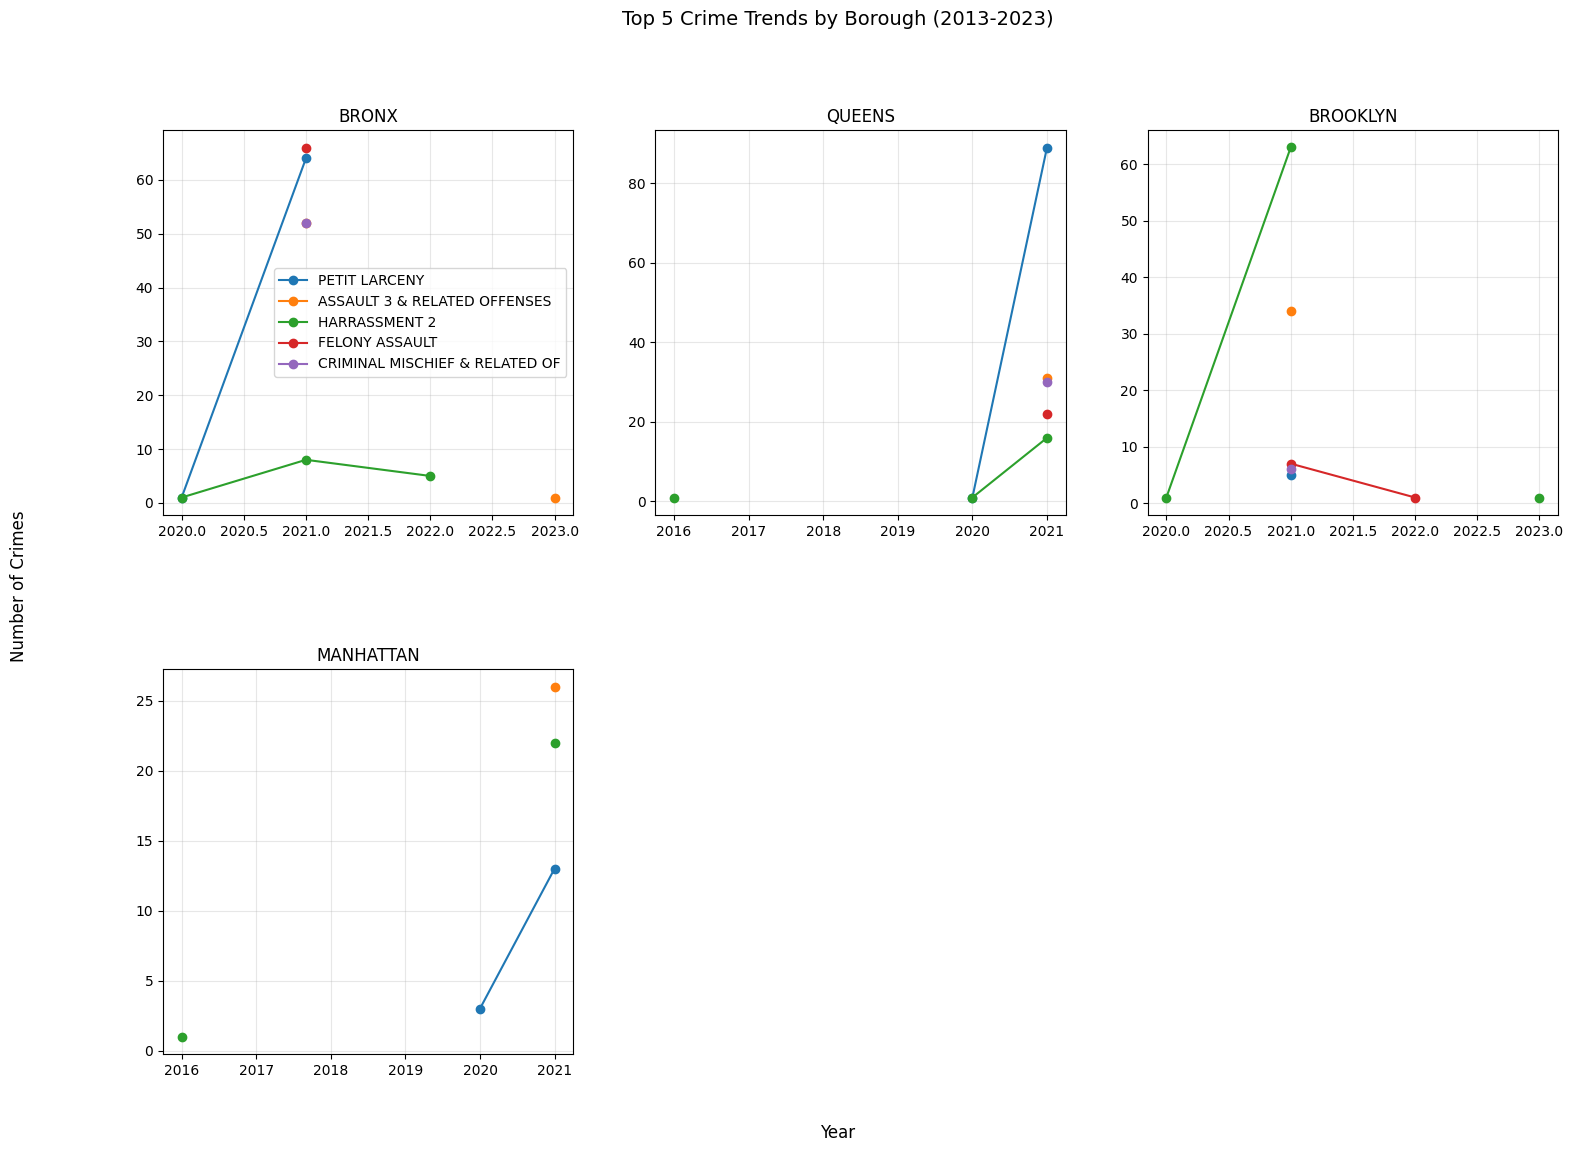

In [70]:
# list of unique boroughs
boroughs = filtered_df['BORO_NM'].dropna().unique()

# number of boroughts
num_boroughs = len(boroughs)

# Determine no. of rows and columns we need for the subplots
# use 3 columns for the plot, and calculate the number of rows needed based on the number of boroughs
rows = (num_boroughs // 3) + (1 if num_boroughs % 3 > 0 else 0)  # Calculate number of rows
cols = min(num_boroughs, 3)  # Max 3 columns per row

# Create the subplots grid (rows x cols)
fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))  # Set figure size
plt.subplots_adjust(hspace=0.4)  # Adjust space between plots

# If there is only 1 row or column, axes will not be a 2D array, so we handle that
axes = axes.flatten()

# Get the top 5 crimes overall
top_crimes = filtered_df['OFNS_DESC'].value_counts().head(5).index.tolist() # define top_crimes

# Loop through each borough and plot its data
for i, borough in enumerate(boroughs):
    ax = axes[i]  # Select the subplot for this borough

    # Filter data for this borough and years 2013 to 2023
    borough_data = filtered_df[
        (filtered_df['BORO_NM'] == borough) &  # Select data for this borough
        (filtered_df['YEAR'].between(2013, 2023))  # Select years between 2013 and 2023
    ]

    # Group data by year and crime type (OFNS_DESC), then count the occurrences
    trend_data = borough_data.groupby(['YEAR', 'OFNS_DESC']).size().unstack()

    # Plot the crime trends for the top 5 crimes
    for crime in top_crimes:
        if crime in trend_data.columns:  # If the crime exists in the data for this borough
            ax.plot(trend_data.index, trend_data[crime], marker='o', label=crime)  # Plot the trend

    # Set the title and grid for each subplot
    ax.set_title(borough)  # Set the title as the borough name
    ax.grid(alpha=0.3)  # Add grid for better readability

    # Add a legend only to the first plot (to avoid repeating the legend in each plot)
    if i == 0:
        ax.legend()

# Hide unused subplots (if there are fewer than 6 boroughs)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide the subplot if it's not used

# Add labels and the main title for the entire figure
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=12)  # X-axis label
fig.text(0.04, 0.5, 'Number of Crimes', va='center', rotation='vertical', fontsize=12)  # Y-axis label
fig.suptitle('Top 5 Crime Trends by Borough (2013-2023)', fontsize=14)  # Main title

# Show the plot
plt.show()




In [71]:
# Drop rows with missing coordinates
df_map = filtered_df.dropna(subset=['LAT', 'LONG'])

# Round coordinates to group into grid cells
df_map['lat_bin'] = df_map['LAT'].round(2)
df_map['lon_bin'] = df_map['LONG'].round(2)

# Create a pivot table (like a matrix of counts)
heatmap_data = df_map.groupby(['lat_bin', 'lon_bin']).size().unstack(fill_value=0)


In [72]:
!pip install folium --upgrade
import folium
from folium.plugins import HeatMap

df_map = filtered_df.dropna(subset=['LAT', 'LONG'])
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

heatmap_data = df_map[['LAT', 'LONG']].values.tolist()

# Adjust Heatmap parameters
HeatMap(
    heatmap_data,
    radius=5,  # Decreased radius for more concentrated heat
    blur=4,    # Decreased blur for sharper heat spots
    max_zoom=18 # Increased max_zoom for better visibility at higher zoom levels
).add_to(nyc_map)

nyc_map

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 3.6 MB/s eta 0:00:00


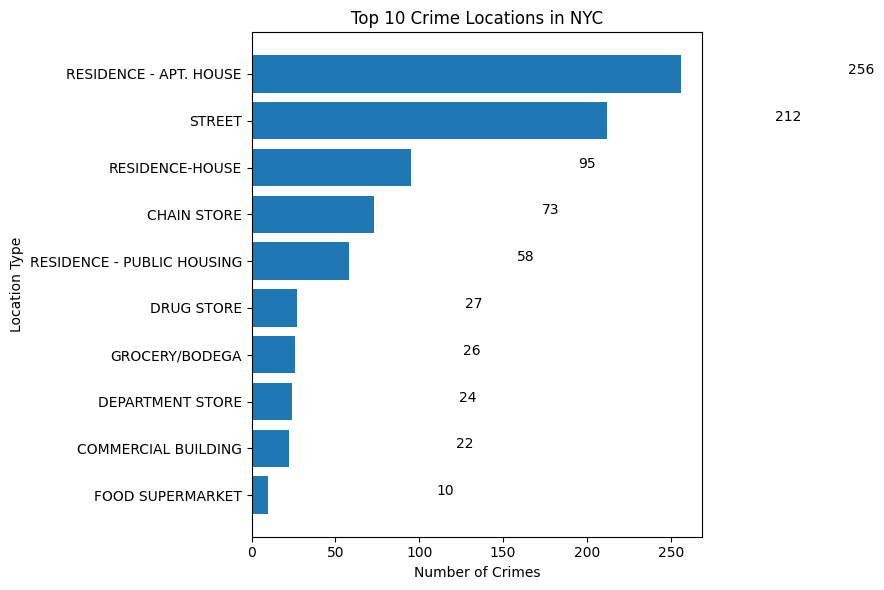

In [73]:
# ount the top 10 most common crime locations
top_locations = filtered_df['PREM_TYP_DESC'].value_counts().head(10)


plt.figure(figsize=(10, 6))

plt.barh(top_locations.index, top_locations.values)

plt.title('Top 10 Crime Locations in NYC')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Type')


for i in range(len(top_locations.values)):
    value = top_locations.values[i]  # Get the value of the bar
    plt.text(value + 100, i, str(value))  # Slight offset so text isn't inside the bar

# Flip the y-axis so the top location appears at the top
plt.gca().invert_yaxis()

# Show the chart
plt.tight_layout()
plt.show()



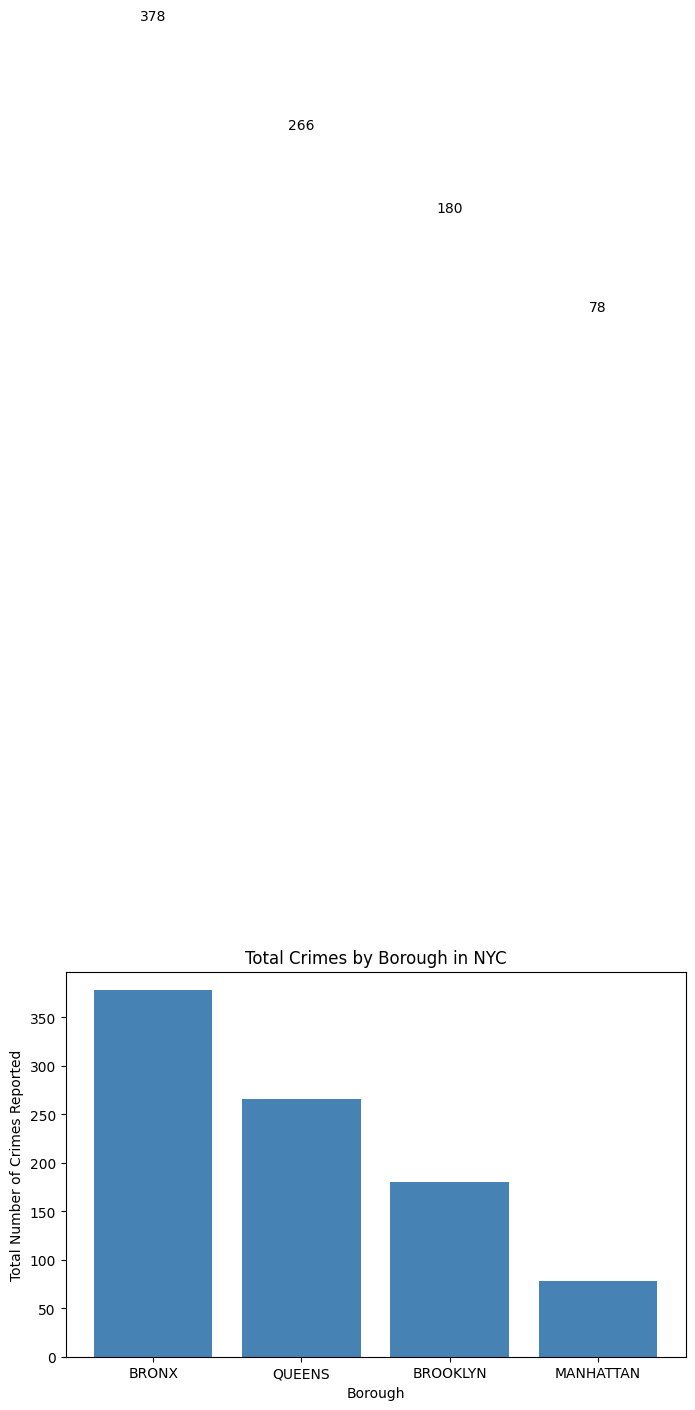

In [74]:
boro_counts = filtered_df['BORO_NM'].value_counts()


plt.figure(figsize=(8, 5))
bars = plt.bar(boro_counts.index, boro_counts.values, color='steelblue')

plt.title('Total Crimes by Borough in NYC')
plt.xlabel('Borough')
plt.ylabel('Total Number of Crimes Reported')

# crime count on top of each bar
i = 0
for bar in bars:
    height = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, str(int(height)), ha='center')
    i = i + 1

plt.show()





/tmp/ipython-input-1200773849.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HOUR'] = pd.to_datetime(df['CMPLNT_FR_TM'], errors='coerce').dt.hour.fillna(df['HOUR'])
/tmp/ipython-input-1200773849.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('UNKNOWN', inplace=True)
/tmp/ipython-input-1200773849.py:43: FutureWarning: A value is trying to be set on a copy of a

              precision    recall  f1-score   support

       OTHER       1.00      1.00      1.00       181

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



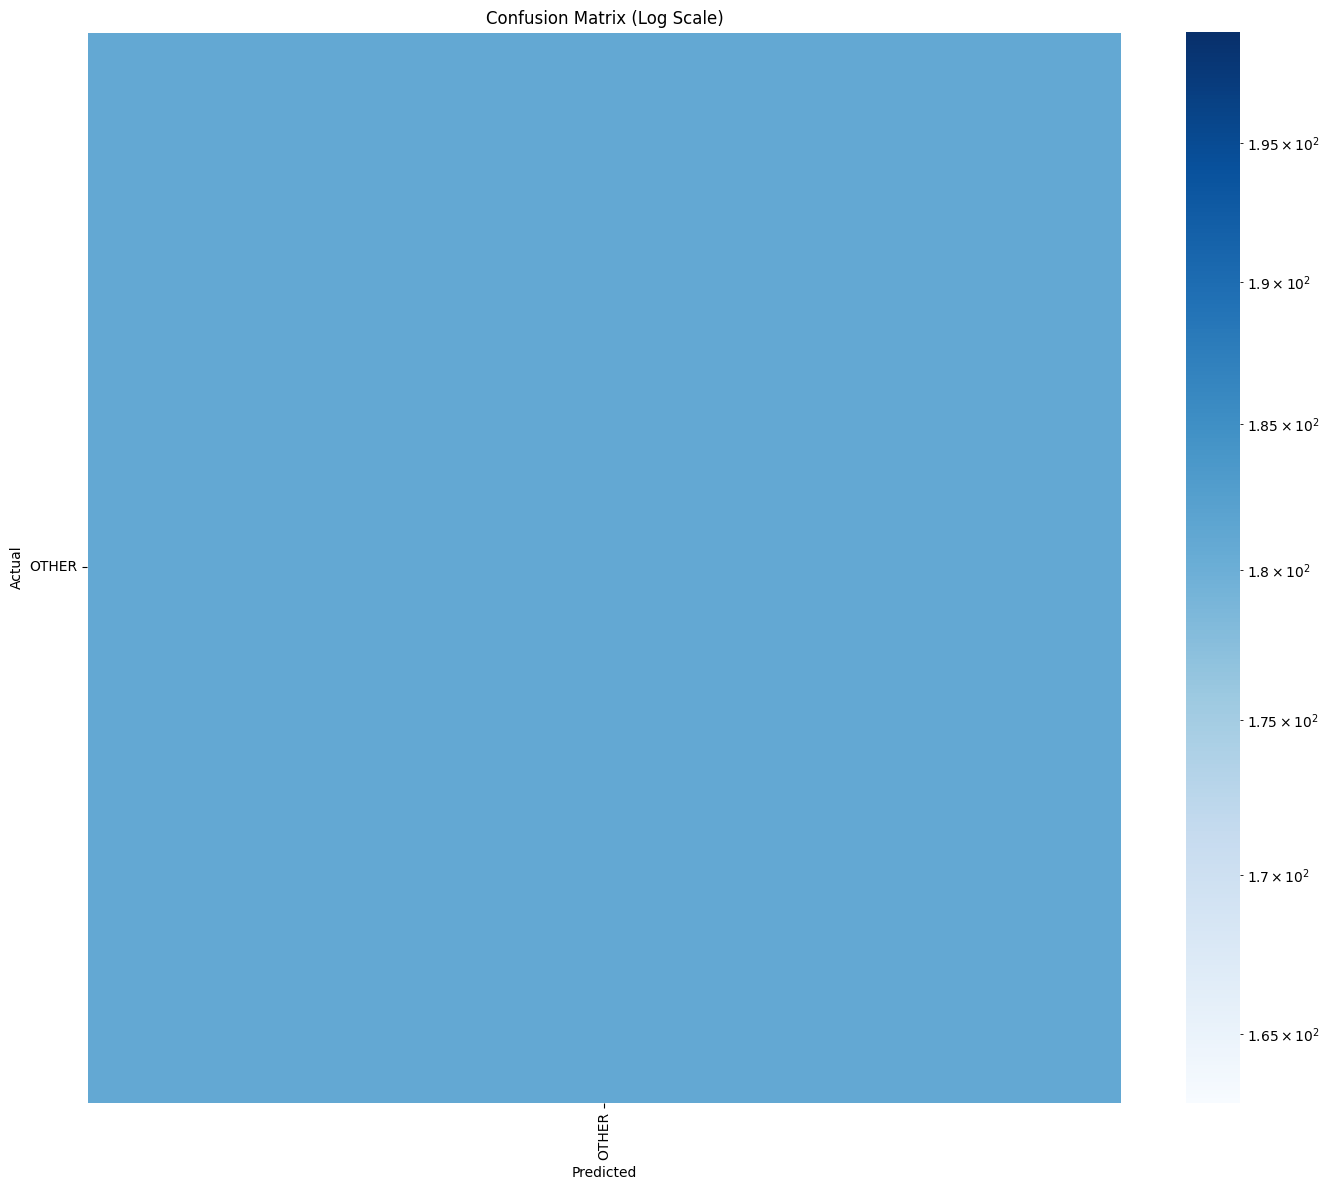

In [77]:
!pip install lightgbm
!pip install imbalanced-learn
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# use 100% of the data

df = filtered_df.sample(frac=1.0, random_state=42).copy()

# Drop irrelevant columns
df.drop(columns=['CMPLNT_NUM'], inplace=True)

# Convert and extract features from date
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')
df['MONTH'] = df['CMPLNT_FR_DT'].dt.month
df['DAY'] = df['CMPLNT_FR_DT'].dt.day
df['WEEKDAY'] = df['CMPLNT_FR_DT'].dt.weekday

# Extract hour if available
df['HOUR'] = pd.to_datetime(df['CMPLNT_FR_TM'], errors='coerce').dt.hour.fillna(df['HOUR'])

# Drop original date/time columns
df.drop(columns=['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'RPT_DT'], inplace=True)

# Label encode categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('OFNS_DESC')
# Group offense types with < 4000 counts into 'OTHER'
offense_counts = df['OFNS_DESC'].value_counts()
rare_offenses = offense_counts[offense_counts < 4000].index
df['OFNS_DESC'] = df['OFNS_DESC'].replace(rare_offenses, 'OTHER')


label_encoders = {}
for col in categorical_cols:
    df[col].fillna('UNKNOWN', inplace=True)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Handle target variable
df['OFNS_DESC'] = df['OFNS_DESC'].fillna('UNKNOWN')  # Handle NaN values
target_encoder = LabelEncoder()
df['OFNS_DESC'] = target_encoder.fit_transform(df['OFNS_DESC'])
target_names = [str(x) for x in target_encoder.classes_]  # Ensure all are strings

# Fill missing numeric values
df.fillna(-999, inplace=True)

# Split data
X = df.drop(columns='OFNS_DESC')
y = df['OFNS_DESC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = xgb.XGBClassifier(
    eval_metric='mlogloss',
    max_depth=8,
    learning_rate=0.1,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    base_score=0.5) # Set base_score to a value between 0 and 1
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, cmap='Blues', xticklabels=target_names, yticklabels=target_names, norm='log', linewidths=.5)
plt.title('Confusion Matrix (Log Scale)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [78]:
filtered_df.to_csv('filtered_df.csv', index=False)